In [1]:
import numpy as np
import pandas as pd
import datetime
from sklearn.linear_model import LinearRegression

In [2]:
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2025_MAF3646E/Módulo 6 - Características en series de tiempo/'
df_h2o=pd.read_csv(ruta+'h2o.csv')
df_h2o.head()

,x,fecha
0,0.429795,1991-07-01
1,0.400906,1991-08-01
2,0.432159,1991-09-01
3,0.492543,1991-10-01
4,0.502369,1991-11-01


<Axes: >

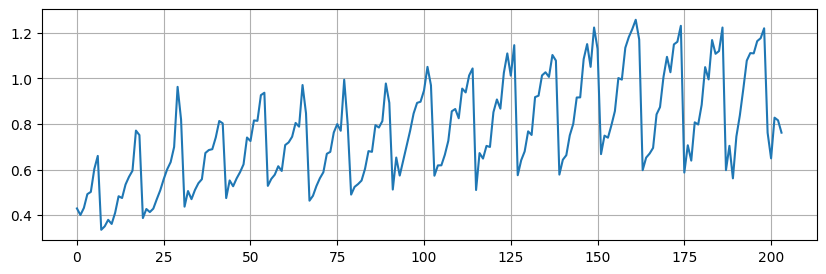

In [ ]:
df_h2o['x'].plot(grid=True,figsize=(10,3))

Extraemos media y desviación estandar

In [9]:
import matplotlib.pyplot as plt

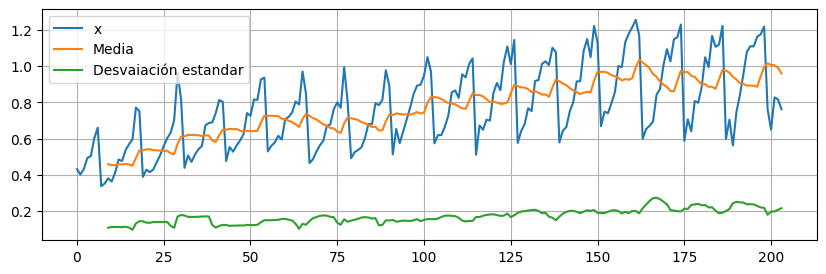

In [13]:
w=10 # Ventanita

media=df_h2o['x'].rolling(w).mean()
std=df_h2o['x'].rolling(w).std()

df_h2o['x'].plot(grid=True,figsize=(10,3))
media.plot(grid=True,label='Media')
std.plot(grid=True,label='Desvaiación estandar')
plt.legend()

Codificación del time

In [14]:
df_h2o['fecha']=pd.to_datetime(df_h2o['fecha']) # Es mejor hacer esta variable index
df_h2o.dtypes

,0
x,float64
fecha,datetime64[ns]


In [15]:
df_h2o['día']=df_h2o['fecha'].dt.day_of_year
df_h2o.head()

,x,fecha,día
0,0.429795,1991-07-01,182
1,0.400906,1991-08-01,213
2,0.432159,1991-09-01,244
3,0.492543,1991-10-01,274
4,0.502369,1991-11-01,305


<Axes: >

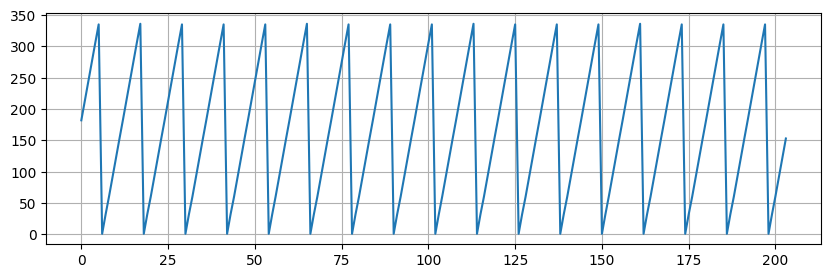

In [16]:
df_h2o['día'].plot(grid=True,figsize=(10,3)) # Función triangular

<Axes: >

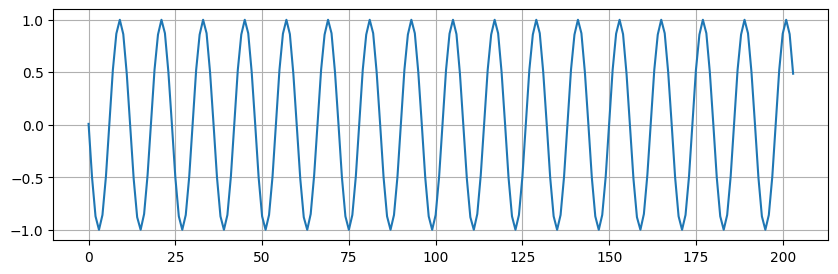

In [17]:
# Función senoidal
df_h2o['día_seno']=np.sin(2*np.pi*df_h2o['día']/365)
df_h2o['día_seno'].plot(grid=True,figsize=(10,3))

In [18]:
df_h2o.head()

,x,fecha,día,día_seno
0,0.429795,1991-07-01,182,0.008607
1,0.400906,1991-08-01,213,-0.501242
2,0.432159,1991-09-01,244,-0.871706
3,0.492543,1991-10-01,274,-0.999991
4,0.502369,1991-11-01,305,-0.858764


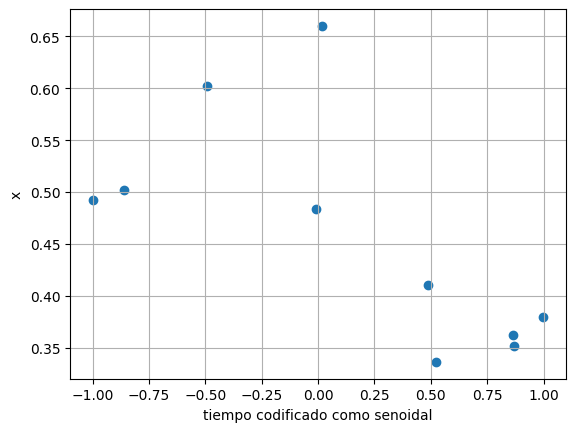

In [42]:
# Tendencia
#
lin=LinearRegression()

i=3
x=df_h2o.iloc[i:w+i,3].values.reshape(-1,1)
y=df_h2o.iloc[i:w+i,0]
lin.fit(x,y)
plt.scatter(x,y) # Extraemos la pendiente que mejor se ajuste a la distribución de puntitos  ->  rolling(w).apply(....,axis=1)
plt.xlabel('tiempo codificado como senoidal')
plt.ylabel('x')
plt.grid()

In [ ]:
lin.coef_[0] # tendencia para la ventana con i=3

np.float64(-0.10042418992068333)